In [7]:
import yfinance as yf
import pandas as pd
import datetime

In [ ]:

df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,AAL,28.982893,29.090000,29.299999,28.650000,28.980000,6451100.0
2020-01-03,AAL,27.548195,27.650000,28.290001,27.340000,28.270000,14008900.0
2020-01-06,AAL,27.219410,27.320000,27.490000,27.080000,27.190001,6105800.0
2020-01-07,AAL,27.119778,27.219999,27.680000,27.059999,27.559999,6105900.0
2020-01-08,AAL,27.737495,27.840000,28.090000,27.070000,27.100000,10496800.0


In [ ]:
!pip install yahoo_fin
!pip install requests_html

In [19]:
from yahoo_fin.stock_info import get_data

In [20]:
import yahoo_fin.stock_info as si
sp500_list = si.tickers_sp500()

In [8]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [9]:
tickers_ls = tickers.Symbol.to_list()

In [6]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 6, 30)
stock_price_data = yf.download(tickers_ls, start=start, end=end)

[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-01 00:00:00 -> 2023-06-30 00:00:00)')


In [170]:
stock_price_data.head()

Adj Close                                              \
                             A        AAL       AAPL       ABBV        ABT   
Date                                                                         
2020-01-02 00:00:00  83.948051  28.982893  73.249039  75.656303  81.730179   
2020-01-03 00:00:00  82.600189  27.548195  72.536896  74.938187  80.733826   
2020-01-06 00:00:00  82.844376  27.219410  73.114899  75.529594  81.156815   
2020-01-07 00:00:00  83.098328  27.119778  72.771011  75.098709  80.705627   
2020-01-08 00:00:00  83.918762  27.737495  73.941628  75.630966  81.034622   

                                                                               \
                          ACGL         ACN        ADBE         ADI        ADM   
Date                                                                            
2020-01-02 00:00:00  43.400002  199.225418  334.429993  112.303558  42.027325   
2020-01-03 00:00:00  43.349998  198.893555  331.809998  110.326599  41.945286   
2020-01-06 00:00:00  43.520000  197.594833  333.709991  109.030396  41.617165   
2020-01-07 00:00:00  43.160000  193.328751  333.390015  111.510902  41.115860   
2020-01-08 00:00:00  42.730000  193.707947  337.869995  112.518028  40.660137   

                     ...   Volume                                       \
                     ...     WYNN      XEL       XOM     XRAY      XYL   
Date                 ...                                                 
2020-01-02 00:00:00  ...  3006500  2915400  12456400  1556600   869500   
2020-01-03 00:00:00  ...  1760500  2422500  17386900   910000   795100   
2020-01-06 00:00:00  ...  1357900  2217100  20081900   751000   817300   
2020-01-07 00:00:00  ...  1722100  1861100  17387700   792600   662200   
2020-01-08 00:00:00  ...  1176200  4828900  15137700  1001500  1083200   

                                                                 
                         YUM      ZBH    ZBRA     ZION      ZTS  
Date                                                             
2020-01-02 00:00:00  1369900  1083972  387800  1528700  1576700  
2020-01-03 00:00:00  1145500   992405  305300  1215800  1274000  
2020-01-06 00:00:00  1454100   972423  322600  1217500  2334100  
2020-01-07 00:00:00  1388600   934519  236300  1450900  1224500  
2020-01-08 00:00:00  1521500   936064  689600  2396000  1766700  

[5 rows x 3018 columns]

In [9]:
monthly_moving_averages = stock_price_data['Adj Close'].rolling(window=30).mean()

In [10]:
monthly_moving_averages

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,121.067805,15.145333,178.342505,137.950660,104.739346,72.255000,299.619268,419.774000,182.319275,72.795981,...,103.415815,64.214561,104.344639,38.715572,105.884873,133.886133,134.828795,272.429001,27.560135,170.768441
2023-06-26,120.758729,15.224333,178.733976,137.566914,104.688258,72.052000,300.454238,424.371667,182.538595,72.768896,...,103.369016,64.041402,104.325135,38.659770,106.080932,133.804114,135.040358,272.690000,27.718015,170.183727
2023-06-27,120.411060,15.335333,179.249613,137.087232,104.598688,71.860000,301.238724,429.499000,182.958955,72.734280,...,103.389260,63.845316,104.314555,38.627551,106.320475,133.685115,135.316591,273.245000,27.891239,169.753008


In [16]:
monthly_moving_averages.index = pd.to_datetime(monthly_moving_averages.index)

last_day_of_month_moving_avg = monthly_moving_averages.groupby(monthly_moving_averages.index.to_period('M')).tail(1)

In [17]:
last_day_of_month_moving_avg

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,68.147997,51.919825,40.275178,87.747239,54.655791,29.889667,146.613281,198.596333,80.708135,36.047627,...,161.577767,37.912395,61.419794,56.229918,68.502274,73.625308,113.115553,123.766000,45.389060,74.781823
2018-03-29,66.500135,52.326947,41.485005,86.973362,55.587283,28.960445,145.940442,214.487333,81.962263,36.852888,...,163.987955,37.672724,56.914245,52.730487,71.475318,73.887631,107.987539,137.986332,46.316588,79.423874
2018-04-30,64.330263,47.643785,40.385733,74.298294,54.430951,27.634445,140.313287,222.232334,81.483318,38.126878,...,172.398010,38.936367,57.895830,47.834025,71.889726,77.050484,102.224752,139.363666,44.938888,80.617151
2018-05-31,63.193223,42.626889,42.894046,78.710576,55.182894,26.512333,142.739613,233.417334,82.733713,38.609934,...,180.824021,39.051263,60.758159,45.398555,67.996936,76.232674,106.182852,146.545000,47.491989,80.818722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,151.001516,16.387667,146.645386,146.266330,107.616483,65.132333,276.865335,361.305003,175.213925,81.687314,...,103.589750,66.894648,111.001124,36.469863,104.524463,127.572208,125.421367,313.481001,50.153824,165.454036
2023-03-31,137.659103,15.067667,153.100204,151.179825,98.885533,67.758000,263.041657,350.357999,184.344049,78.014377,...,108.201715,64.748836,106.185911,36.917269,100.078591,126.797676,124.411347,298.123332,38.069854,165.375347
2023-04-28,135.804090,13.694000,162.506143,156.528891,102.622346,69.280667,274.134196,374.988332,186.070381,78.233236,...,109.353046,68.120900,110.370334,39.275476,101.074025,131.758677,130.880785,295.878664,28.671558,168.942069


In [19]:
trading_volume_monthly = stock_price_data['Volume'].rolling(window=30).mean()

In [20]:
trading_volume_monthly.index = pd.to_datetime(trading_volume_monthly.index)

trading_volume_mma = trading_volume_monthly.groupby(trading_volume_monthly.index.to_period('M')).tail(1)

In [30]:
last_day_of_month_moving_avg_reset = last_day_of_month_moving_avg.reset_index()

# Melt the DataFrame to reshape it
melted_df = pd.melt(last_day_of_month_moving_avg_reset, id_vars=['Date'], var_name='Tickers', value_name='Adj Close')


In [31]:
melted_df

,Date,Tickers,Adj Close
0,2018-01-31,A,NaN
1,2018-02-28,A,68.147997
2,2018-03-29,A,66.500135
3,2018-04-30,A,64.330263
4,2018-05-31,A,63.193223
...,...,...,...
33193,2023-02-28,ZTS,165.454036
33194,2023-03-31,ZTS,165.375347
33195,2023-04-28,ZTS,168.942069
33196,2023-05-31,ZTS,176.235916


In [40]:
len(tickers_ls)

503

In [5]:
api_key_index = 0

In [63]:
## Loop through all API keys to get 5 tickers each, countdown 60 seconds, and
## repeat loop until end of ticker_ls

import requests
import time
import pandas as pd

api_keys = ["O9Z5FCM7GG8AMV2Q",
            "OCUEDX9MCEFW49B1", "JW8YEUOOJ20HAAM0", "2QFGRV5LW6WXST9U"]
tickers = tickers_ls

all_data = []

# Function to perform API requests and data retrieval
def perform_api_requests(tickers_chunk, api_key):
    for ticker in tickers_chunk:
        url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker}&apikey={api_key}'

        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            all_data.append({"symbol": ticker, "data": data})
        else:
            print(f"Error for symbol {ticker}: {response.status_code}")

# Initialize API key index
api_key_index = 0

# Set the maximum number of times an API key should be used
max_api_key_usage = 16

start_index = 240

# Loop through tickers in groups of 5
for i in range(start_index, len(tickers), 5):
    # Get the current API key
    api_key = api_keys[api_key_index]

    # Loop through tickers_chunk using the current API key
    tickers_chunk = tickers[i:i+5]
    perform_api_requests(tickers_chunk, api_key)

    print(f"Completed batch from index {i} to {i+4} with API key {api_key}")

    # Increment API key index
    api_key_index = (api_key_index + 1) % len(api_keys)

    # If multiple of 4, wait 60 seconds
    if api_key_index==3:
        print("Waiting for 60 seconds...")
        for remaining_time in range(60, 0, -1):
            print(f"Time remaining: {remaining_time} seconds", end="\r")
            time.sleep(1)
        print("\nContinuing with the next batch...")

df_list = []
for item in all_data:
    symbol = item['symbol']
    data = item['data']

    if 'quarterlyReports' in data:
        quarterly_data = data['quarterlyReports']
        df = pd.DataFrame(quarterly_data)
        df['Symbol'] = symbol
        df_list.append(df)

appended_df = pd.concat(df_list, ignore_index=True)


Completed batch from index 240 to 244 with API key O9Z5FCM7GG8AMV2Q
Completed batch from index 245 to 249 with API key OCUEDX9MCEFW49B1
Completed batch from index 250 to 254 with API key JW8YEUOOJ20HAAM0
Waiting for 60 seconds...

Continuing with the next batch...
Completed batch from index 255 to 259 with API key 2QFGRV5LW6WXST9U
Completed batch from index 260 to 264 with API key O9Z5FCM7GG8AMV2Q
Completed batch from index 265 to 269 with API key OCUEDX9MCEFW49B1
Completed batch from index 270 to 274 with API key JW8YEUOOJ20HAAM0
Waiting for 60 seconds...

Continuing with the next batch...
Completed batch from index 275 to 279 with API key 2QFGRV5LW6WXST9U
Completed batch from index 280 to 284 with API key O9Z5FCM7GG8AMV2Q
Completed batch from index 285 to 289 with API key OCUEDX9MCEFW49B1
Completed batch from index 290 to 294 with API key JW8YEUOOJ20HAAM0
Waiting for 60 seconds...

Continuing with the next batch...
Completed batch from index 295 to 299 with API key 2QFGRV5LW6WXST9U
C

In [64]:
all_data

Output hidden; open in https://colab.research.google.com to view.

In [65]:
# Create a DataFrame from the collected data
df_list = []
for item in all_data:
    symbol = item['symbol']
    data = item['data']

    if 'quarterlyReports' in data:
        quarterly_data = data['quarterlyReports']

        df = pd.DataFrame(quarterly_data)

        df['Symbol'] = symbol

        df_list.append(df)

is_appended_df6 = pd.concat(df_list, ignore_index=True)


In [66]:
is_appended_df6

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,Symbol
0,2023-06-30,USD,232000000,1593000000,1361000000,1196000000,285000000,88000000,9000000,171000000,...,67000000,243000000,50000000,55000000,193000000,191000000,298000000,365000000,193000000,HWM
1,2023-03-31,USD,235000000,1547000000,1312000000,1164000000,285000000,75000000,9000000,154000000,...,69000000,220000000,72000000,58000000,148000000,183000000,277000000,346000000,148000000,HWM
2,2022-12-31,USD,169000000,1450000000,1281000000,1110000000,220000000,63000000,9000000,325000000,...,67000000,148000000,37000000,63000000,111000000,381000000,205000000,272000000,111000000,HWM
3,2022-09-30,USD,180000000,1379000000,1199000000,1056000000,228000000,73000000,7000000,87000000,...,65000000,104000000,24000000,57000000,80000000,-39000000,161000000,226000000,80000000,HWM
4,2022-06-30,USD,195000000,1335000000,1140000000,987000000,241000000,83000000,9000000,168000000,...,67000000,183000000,36000000,59000000,147000000,19000000,240000000,307000000,147000000,HWM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,2019-09-30,USD,654000000,1584000000,930000000,479000000,91000000,391000000,112000000,563000000,...,60000000,528000000,95000000,56000000,433000000,403000000,584000000,644000000,433000000,ZTS
5231,2019-06-30,USD,676000000,1547000000,871000000,465000000,159000000,406000000,111000000,517000000,...,58000000,455000000,84000000,55000000,371000000,300000000,510000000,568000000,371000000,ZTS
5232,2019-03-31,USD,558000000,1455000000,897000000,518000000,77000000,369000000,102000000,481000000,...,58000000,381000000,69000000,56000000,312000000,343000000,437000000,495000000,312000000,ZTS
5233,2018-12-31,USD,1564000000,1564000000,1048000000,544000000,1564000000,420000000,125000000,589000000,...,61000000,418000000,73000000,59000000,345000000,335000000,477000000,538000000,345000000,ZTS


In [554]:
appended_df

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Symbol
0,2023-06-30,USD,25712000000,17200000000,1330000000,1403000000,8806000000,3291000000,7583000000,4152000000,...,4278000000,667000000,3002000000,871000000,10575000000,1320000000,11279000000,1000000,150630209,BG
1,2023-03-31,USD,27110000000,19040000000,3052000000,3149000000,8952000000,3508000000,7175000000,3731000000,...,4312000000,540000000,3116000000,802000000,9955000000,1320000000,10757000000,1000000,150585513,BG
2,2022-12-31,USD,24580000000,16758000000,1104000000,1223000000,8408000000,3661000000,7029000000,3617000000,...,3259000000,4651000000,3379000000,849000000,9224000000,1320000000,10222000000,1000000,149907932,BG
3,2022-09-30,USD,24792000000,17195000000,956000000,1046000000,8112000000,3157000000,6880000000,3408000000,...,2997000000,1327000000,3563000000,918000000,8705000000,1320000000,9980000000,1000000,149796910,BG
4,2022-06-30,USD,27419000000,19732000000,818000000,990000000,10481000000,3108000000,6994000000,3463000000,...,3062000000,2154000000,3840000000,816000000,8732000000,1120000000,9692000000,1000000,151885454,BG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2019-09-30,USD,11272000000,4618000000,1815000000,1827000000,1439000000,1030000000,6582000000,1813000000,...,6447000000,13053000000,48000000,198000000,2678000000,1876000000,4217000000,5000000,476745789,ZTS
16,2019-06-30,USD,10986000000,4484000000,1755000000,1780000000,1404000000,994000000,6442000000,1739000000,...,6446000000,13054000000,55000000,188000000,2411000000,1732000000,3788000000,5000000,477821280,ZTS
17,2019-03-31,USD,10883000000,4379000000,1728000000,1793000000,1361000000,970000000,6281000000,1683000000,...,6444000000,13056000000,55000000,181000000,2317000000,1593000000,3495000000,5000000,479026001,ZTS
18,2018-12-31,USD,10777000000,4399000000,1602000000,1701000000,1391000000,1077000000,6317000000,1658000000,...,6443000000,7666000000,34000000,187000000,2185000000,1487000000,3270000000,5000000,479562326,ZTS


In [130]:
import os

current_directory = os.getcwd()
print(f'Current working directory: {current_directory}')


Current working directory: /content


In [73]:
file_path = '/content/SP500_income_statement.csv'

is_df.to_csv(file_path, index=True)

with open(file_path, 'w', newline='') as file:
    is_df.to_csv(file, index=True)

print(f'DataFrame saved to {file_path}')

DataFrame saved to /content/SP500_income_statement.csv


In [4]:
## Monthly moving averages

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate monthly moving average with a 30-day rolling window
monthly_moving_average = df['Value'].rolling('30D').mean()

print(monthly_moving_average)


In [144]:
from google.colab import files
uploaded = files.upload()


Saving NLP_monthly_2209019.csv to NLP_monthly_2209019.csv


In [145]:
import pandas as pd

file_name = "NLP_features.csv"

NLP = pd.read_csv(file_name)


In [148]:
NLP_features = NLP[['Date','Stock','pos_ma','neu_ma','neg_ma']]
NLP_features

,Date,Stock,pos_ma,neu_ma,neg_ma
0,2022-09-30,A,1.000000,5.829613e-08,8.049628e-09
1,2022-10-31,A,1.000000,5.497283e-08,7.521992e-09
2,2022-11-30,A,0.999996,4.380394e-06,5.380639e-08
3,2022-12-31,A,0.395974,6.039033e-01,1.226440e-04
4,2023-01-31,A,0.993029,1.702921e-03,5.268022e-03
...,...,...,...,...,...
5621,2023-05-31,ZTS,0.997409,2.581499e-03,9.721753e-06
5622,2023-06-30,ZTS,0.135247,8.064744e-01,5.827819e-02
5623,2023-07-31,ZTS,0.000046,9.924890e-01,7.464570e-03
5624,2023-08-31,ZTS,0.338144,3.284520e-01,3.334039e-01


In [17]:
nan_percentage = (bal_income.isna().sum() / len(bal_income)) * 100

In [4]:
bal_inc=bal_income.dropna()

In [8]:
bal_inc.drop(columns=['Unnamed: 0.1'], inplace=True)
bal_inc

<ipython-input-8-8149bb22e2ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bal_inc.drop(columns=['Unnamed: 0.1'], inplace=True)


,fiscalDateEnding,reportedCurrency_x,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2023-06-30,USD,3719000000,8325000000,4606000000,4606000000,-8958000000,12204000000,473000000,12325000000,...,3033000000,12954000000,14203000000,3471000000,14651000000,7798000000,32926000000,40290000000,9000000,551992430
1,2023-03-31,USD,3418000000,8031000000,4613000000,4613000000,1241000000,1705000000,472000000,1827000000,...,3012000000,12948000000,14848000000,3279000000,5448000000,15298000000,32963000000,47966000000,9000000,551672217
2,2022-12-31,USD,3494000000,8079000000,4585000000,4585000000,632000000,2146000000,445000000,3646000000,...,1938000000,14001000000,15939000000,3190000000,5615000000,14722000000,33255000000,47950000000,9000000,549245105
3,2022-09-30,USD,3891000000,8619000000,4728000000,4728000000,4156000000,1998000000,461000000,-602000000,...,1856000000,13849000000,15705000000,3396000000,5556000000,14080000000,32843000000,48245000000,9000000,552742915
4,2022-06-30,USD,3609000000,8702000000,5093000000,5093000000,110000000,3023000000,476000000,3152000000,...,2257000000,14019000000,15921000000,3178000000,4681000000,13742000000,30781000000,45269000000,9000000,569603928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,2019-09-30,USD,654000000.0,1584000000.0,930000000.0,479000000,91000000.0,391000000,112000000,563000000.0,...,34000000,6447000000,13053000000,48000000,198000000,2678000000,1876000000,4217000000,5000000,476745789
9942,2019-06-30,USD,676000000.0,1547000000.0,871000000.0,465000000,159000000.0,406000000,111000000,517000000.0,...,36000000,6446000000,13054000000,55000000,188000000,2411000000,1732000000,3788000000,5000000,477821280
9943,2019-03-31,USD,558000000.0,1455000000.0,897000000.0,518000000,77000000.0,369000000,102000000,481000000.0,...,33000000,6444000000,13056000000,55000000,181000000,2317000000,1593000000,3495000000,5000000,479026001
9944,2018-12-31,USD,1564000000.0,1564000000.0,1048000000.0,544000000,1564000000.0,420000000,125000000,589000000.0,...,0,6443000000,7666000000,34000000,187000000,2185000000,1487000000,3270000000,5000000,479562326


In [79]:
import pandas as pd

# Merge the DataFrames on 'fiscalDateEnding' and 'Symbol' columns
merged_df = income_statement.merge(bal_sheet, on=['fiscalDateEnding', 'Symbol'], how='outer')


In [80]:
merged_df.shape

(9964, 65)

In [81]:
merged_df

,fiscalDateEnding,reportedCurrency_x,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2023-06-30,USD,3719000000,8325000000,4606000000,4606000000,-8958000000,12204000000,473000000,12325000000,...,3033000000,12954000000,14203000000,3471000000,14651000000,7798000000,32926000000,40290000000,9000000,551992430
1,2023-03-31,USD,3418000000,8031000000,4613000000,4613000000,1241000000,1705000000,472000000,1827000000,...,3012000000,12948000000,14848000000,3279000000,5448000000,15298000000,32963000000,47966000000,9000000,551672217
2,2022-12-31,USD,3494000000,8079000000,4585000000,4585000000,632000000,2146000000,445000000,3646000000,...,1938000000,14001000000,15939000000,3190000000,5615000000,14722000000,33255000000,47950000000,9000000,549245105
3,2022-09-30,USD,3891000000,8619000000,4728000000,4728000000,4156000000,1998000000,461000000,-602000000,...,1856000000,13849000000,15705000000,3396000000,5556000000,14080000000,32843000000,48245000000,9000000,552742915
4,2022-06-30,USD,3609000000,8702000000,5093000000,5093000000,110000000,3023000000,476000000,3152000000,...,2257000000,14019000000,15921000000,3178000000,4681000000,13742000000,30781000000,45269000000,9000000,569603928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,1011000000,11515000000,342000000,None,69000000,None
9960,2018-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,9968000000,10111000000,None,53223000000,24000000,1417000000
9961,2022-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1284800000,None,3913600000,114200000,300700000,2658600000,-5205900000,5696900000,100000,161638620
9962,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1508100000,11214300000,0,2319900000,960800000,0,999700000,6031100000,6100000,100


In [82]:
import pandas as pd

merged_df['fiscalDateEnding'] = pd.to_datetime(merged_df['fiscalDateEnding'])

# Filter rows where 'fiscalDateEnding' is greater than or equal to January 1, 2018
filtered_df = merged_df[merged_df['fiscalDateEnding'] >= pd.Timestamp('2018-01-01')]



In [83]:
filtered_df.shape

(9961, 65)

In [84]:
filtered_df.columns

Index(['fiscalDateEnding', 'reportedCurrency_x', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome', 'Symbol',
       'Unnamed: 0', 'reportedCurrency_y', 'totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill'

In [85]:
file_path = '/content/SP500_bal_income.csv'

filtered_df.to_csv(file_path, index=True)

with open(file_path, 'w', newline='') as file:
    filtered_df.to_csv(file, index=True)

print(f'DataFrame saved to {file_path}')

DataFrame saved to /content/SP500_bal_income.csv


In [ ]:
## Company News via Finnhub

In [5]:
## FinnHub sample

import requests
import pandas as pd

api_key = 'ck04kehr01qjaspcnvk0ck04kehr01qjaspcnvkg'

symbol = 'AAPL'

endpoint = f'https://finnhub.io/api/v1/company-news?symbol={symbol}&from=2022-09-13&to=2023-09-12&token={api_key}'

response = requests.get(endpoint)

if response.status_code == 200:
    news_data = response.json()
    news_list = []

    # Iterate through the company-specific news articles
    for article in news_data:
        news_dict = {
            'Title': article['headline'],
            'Source': article['source'],
            'URL': article['url'],
            'Summary': article['summary']
        }
        news_list.append(news_dict)

    news_df = pd.DataFrame(news_list)

    print(news_df)
else:
    print(f"Error: {response.status_code} - {response.text}")


                                                 Title         Source  \
0    MORNING BID AMERICAS-Risk and rates moving in ...        Finnhub   
1    Apple's iPhone 15 launch clouded by China prob...        Finnhub   
2        Apple: Trouble In Paradise Or Undeserved FUD?   SeekingAlpha   
3    IPhone 15 with USB-C : a change that could div...        Finnhub   
4     Dividend Growth Stock Watchlist - September 2023   SeekingAlpha   
..                                                 ...            ...   
222  The iPhone 15 is coming: Everything to expect ...    MarketWatch   
223  AAPL Stock Alert: Is China About to Ban Apple ...  InvestorPlace   
224  Nasdaq, S&P, Dow rise despite concerns over Fe...  Seeking Alpha   
225  Qualcomm: Downgrading To Sell - Higher Risk Pr...   SeekingAlpha   
226  What is in Huawei's new smartphone challenger ...        Finnhub   

                                                   URL  \
0    https://finnhub.io/api/news?id=a1fefba76060490...   
1    ht

In [6]:
news_df

,Title,Source,URL,Summary
0,MORNING BID AMERICAS-Risk and rates moving in ...,Finnhub,https://finnhub.io/api/news?id=a1fefba76060490...,A look at the day ahead in U.S. and global mar...
1,Apple's iPhone 15 launch clouded by China prob...,Finnhub,https://finnhub.io/api/news?id=e8fa551a85a76f8...,Apple on Tuesday is expected to unveil a new i...
2,Apple: Trouble In Paradise Or Undeserved FUD?,SeekingAlpha,https://finnhub.io/api/news?id=896a439ffa87f73...,Apple faces challenges in China as the CCP pro...
3,IPhone 15 with USB-C : a change that could div...,Finnhub,https://finnhub.io/api/news?id=4b90e88cb8944db...,Copyright © BusinessAMBE 2023The new iPhone wi...
4,Dividend Growth Stock Watchlist - September 2023,SeekingAlpha,https://finnhub.io/api/news?id=89bb8c0bad887c3...,About half of the 20 stocks on my dividend gro...
...,...,...,...,...
222,The iPhone 15 is coming: Everything to expect ...,MarketWatch,https://finnhub.io/api/news?id=ad7cb154f794b53...,Looking for stock market analysis and research...
223,AAPL Stock Alert: Is China About to Ban Apple ...,InvestorPlace,https://finnhub.io/api/news?id=01fb8d275fb664c...,Looking for stock market analysis and research...
224,"Nasdaq, S&P, Dow rise despite concerns over Fe...",Seeking Alpha,https://finnhub.io/api/news?id=105c31314923db8...,Looking for stock market analysis and research...
225,Qualcomm: Downgrading To Sell - Higher Risk Pr...,SeekingAlpha,https://finnhub.io/api/news?id=07d9a60beced5b2...,Qualcomm is trying to position itself as a mea...


In [59]:
## Get Dividends

import yfinance as yf
import pandas as pd

tickers = tickers_ls

start_date = "2018-01-01"
end_date = "2023-07-31"

dfs = []

for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)

        # Get dividend data within specified date range
        dividends = stock.dividends
        dividends = dividends[(dividends.index >= start_date) & (dividends.index <= end_date)]

        df = pd.DataFrame({"Ticker": ticker, "Date": dividends.index, "Dividend": dividends.values})

        dfs.append(df)

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {str(e)}")

dividend_data = pd.concat(dfs, ignore_index=True)




ERROR:yfinance:BRK.B: No timezone found, symbol may be delisted


Error retrieving data for BRK.B: '>=' not supported between instances of 'builtin_function_or_method' and 'str'


ERROR:yfinance:BF.B: No price data found, symbol may be delisted (1d 1924-10-05 -> 2023-09-12)


Error retrieving data for BF.B: '>=' not supported between instances of 'builtin_function_or_method' and 'str'


In [60]:
dividend_data

,Ticker,Date,Dividend
0,MMM,2018-02-15 00:00:00-05:00,1.360
1,MMM,2018-05-17 00:00:00-04:00,1.360
2,MMM,2018-08-23 00:00:00-04:00,1.360
3,MMM,2018-11-21 00:00:00-05:00,1.360
4,MMM,2019-02-14 00:00:00-05:00,1.440
...,...,...,...
8531,ZTS,2022-07-20 00:00:00-04:00,0.325
8532,ZTS,2022-10-31 00:00:00-04:00,0.325
8533,ZTS,2023-01-19 00:00:00-05:00,0.375
8534,ZTS,2023-04-20 00:00:00-04:00,0.375


In [149]:
file_path = '/content/NLP_features.csv'

NLP_features.to_csv(file_path, index=True)

with open(file_path, 'w', newline='') as file:
    NLP_features.to_csv(file, index=True)

print(f'DataFrame saved to {file_path}')

DataFrame saved to /content/NLP_features.csv


In [23]:
from IPython.display import display

column_names = bal_inc.columns.tolist()
display(column_names)


['fiscalDateEnding',
 'reportedCurrency_x',
 'grossProfit',
 'totalRevenue',
 'costOfRevenue',
 'costofGoodsAndServicesSold',
 'operatingIncome',
 'sellingGeneralAndAdministrative',
 'researchAndDevelopment',
 'operatingExpenses',
 'investmentIncomeNet',
 'netInterestIncome',
 'interestIncome',
 'interestExpense',
 'nonInterestIncome',
 'otherNonOperatingIncome',
 'depreciation',
 'depreciationAndAmortization',
 'incomeBeforeTax',
 'incomeTaxExpense',
 'interestAndDebtExpense',
 'netIncomeFromContinuingOperations',
 'comprehensiveIncomeNetOfTax',
 'ebit',
 'ebitda',
 'netIncome',
 'Symbol',
 'Unnamed: 0',
 'reportedCurrency_y',
 'totalAssets',
 'totalCurrentAssets',
 'cashAndCashEquivalentsAtCarryingValue',
 'cashAndShortTermInvestments',
 'inventory',
 'currentNetReceivables',
 'totalNonCurrentAssets',
 'propertyPlantEquipment',
 'accumulatedDepreciationAmortizationPPE',
 'intangibleAssets',
 'intangibleAssetsExcludingGoodwill',
 'goodwill',
 'investments',
 'longTermInvestments',
 's

In [5]:
df = bal_inc[['fiscalDateEnding','netIncome','totalRevenue','totalShareholderEquity',
             'commonStockSharesOutstanding','totalLiabilities','operatingExpenses',
              'inventory','totalCurrentAssets','totalCurrentLiabilities',
              'costofGoodsAndServicesSold']]


In [6]:
df

,fiscalDateEnding,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,operatingExpenses,inventory,totalCurrentAssets,totalCurrentLiabilities,costofGoodsAndServicesSold
0,2023-06-30,-6.841000e+09,8325000000,7798000000,551992430,41023000000,12325000000,5280000000,15754000000,10936000000,4606000000
1,2023-03-31,9.760000e+08,8031000000,15298000000,551672217,31535000000,1827000000,5306000000,14963000000,10556000000,4613000000
2,2022-12-31,5.410000e+08,8079000000,14722000000,549245105,31685000000,3646000000,5372000000,14688000000,9523000000,4585000000
3,2022-09-30,3.859000e+09,8619000000,14080000000,552742915,32020000000,-602000000,5615000000,14895000000,9543000000,4728000000
4,2022-06-30,7.800000e+07,8702000000,13742000000,569603928,31818000000,3152000000,5645000000,14514000000,9896000000,5093000000
...,...,...,...,...,...,...,...,...,...,...,...
9941,2019-09-30,4.330000e+08,1584000000.0,2678000000,476745789,8594000000,563000000.0,1439000000,4618000000,1052000000,479000000
9942,2019-06-30,3.710000e+08,1547000000.0,2411000000,477821280,8575000000,517000000.0,1404000000,4484000000,1075000000,465000000
9943,2019-03-31,3.120000e+08,1455000000.0,2317000000,479026001,8566000000,481000000.0,1361000000,4379000000,1082000000,518000000
9944,2018-12-31,3.450000e+08,1564000000.0,2185000000,479562326,8592000000,589000000.0,1391000000,4399000000,1223000000,544000000


In [7]:
bal_income.shape

(9961, 66)

In [9]:
import pandas as pd

df_quarterly = bal_inc.reset_index()

df_quarterly['fiscalDateEnding'] = pd.to_datetime(df_quarterly['fiscalDateEnding'])
df_quarterly.set_index('fiscalDateEnding', inplace=True)
tickers = df_quarterly['Symbol'].unique()

df_monthly_interpolated = pd.DataFrame()

for ticker in tickers:
    ticker_data = df_quarterly[df_quarterly['Symbol'] == ticker].copy()

    # Check for duplicate dates within the same quarter for the same ticker
    if ticker_data.index.duplicated().any():
        # Handle duplicates by taking the mean
        ticker_data = ticker_data.resample('M').mean()

    # Create a continuous time series with monthly intervals
    all_months = pd.date_range(start=ticker_data.index.min(), end=ticker_data.index.max(), freq='M')

    # Reindex ticker_data to match continuous time series
    ticker_data = ticker_data.reindex(all_months)

    # Perform linear interpolation within the continuous time series for all columns
    ticker_data = ticker_data.interpolate(method='linear')
    ticker_data['Symbol'] = ticker
    df_monthly_interpolated = pd.concat([df_monthly_interpolated, ticker_data])

df_monthly_interpolated.reset_index(inplace=True)


<ipython-input-9-767a1d9bfa1b>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ticker_data = ticker_data.resample('M').mean()  # Example: Take the sum for monthly data
<ipython-input-9-767a1d9bfa1b>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ticker_data = ticker_data.resample('M').mean()  # Example: Take the sum for monthly data


In [10]:
df_monthly_interpolated

,level_0,index,reportedCurrency_x,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2018-09-30,19.000000,USD,3993000000,8152000000,4159000000,4159000000,2016000000,1547000000,430000000,...,5000000,13539000000,14846000000,3031000000,2906000000,10248000000,28510000000,40120000000,9000000,585600000
1,2018-10-31,18.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-30,18.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-31,18.000000,USD,3885000000,7945000000,4060000000,4060000000,1783000000,1682000000,437000000,...,17000000,13411000000,15350000000,2775000000,3010000000,9796000000,29626000000,40636000000,9000000,576575168
4,2019-01-31,17.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27694,2023-02-28,9927.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27695,2023-03-31,9927.000000,USD,839000000.0,2000000000.0,1161000000.0,588000000,124000000.0,505000000,142000000,...,0,6559000000,8818000000,104000000,216000000,4494000000,4807000000,9045000000,5000000,462495343
27696,2023-04-30,9926.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27697,2023-05-31,9926.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
drop_df = df_monthly_interpolated[['level_0', 'Symbol','netIncome','totalRevenue',
                                   'totalShareholderEquity','commonStockSharesOutstanding',
                                   'totalLiabilities','operatingExpenses','inventory',
                                   'totalCurrentAssets','totalCurrentLiabilities',
                                   'costofGoodsAndServicesSold']]
drop_df

,level_0,Symbol,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,operatingExpenses,inventory,totalCurrentAssets,totalCurrentLiabilities,costofGoodsAndServicesSold
0,2018-09-30,MMM,1.543000e+09,8152000000,10248000000,585600000,26964000000,1608000000,4437000000,14419000000,7336000000,4159000000
1,2018-10-31,MMM,1.477667e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-30,MMM,1.412333e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-31,MMM,1.347000e+09,7945000000,9796000000,576575168,26652000000,2979000000,4366000000,13709000000,7244000000,4060000000
4,2019-01-31,MMM,1.195000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27694,2023-02-28,ZTS,5.216667e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27695,2023-03-31,ZTS,5.520000e+08,2000000000.0,4494000000,462495343,9263000000,715000000.0,2563000000,6269000000,1915000000,588000000
27696,2023-04-30,ZTS,5.916667e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27697,2023-05-31,ZTS,6.313333e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## Interpolate again

import pandas as pd

columns_to_interpolate = ['totalRevenue','totalShareholderEquity','commonStockSharesOutstanding',
                          'totalLiabilities','operatingExpenses','inventory',
                          'totalCurrentAssets','totalCurrentLiabilities',
                          'costofGoodsAndServicesSold']
# columns_to_expand = ['commonStockSharesOutstanding']

df_monthly_interpolated2 = pd.DataFrame()

# Iterate through tickers and perform interpolation for each
for ticker, group in drop_df.groupby('Symbol'):
    # Convert columns to numeric dtype
    group[columns_to_interpolate] = group[columns_to_interpolate].apply(pd.to_numeric, errors='coerce')

    # Interpolate
    group[columns_to_interpolate] = group[columns_to_interpolate].interpolate(method='linear')
    # Backfill commonStockSharesOutstanding values to the previous two months
    # group[columns_to_expand] = group[columns_to_expand].ffill(limit=2)

    df_monthly_interpolated2 = pd.concat([df_monthly_interpolated2, group])

df_monthly_interpolated2.reset_index(inplace=True)


In [15]:
df_monthly_interpolated2.drop(columns=['index'], inplace=True)
df_monthly_interpolated2.rename(columns={'level_0':'fiscalDateEnding'}, inplace=True)
df_monthly_interpolated2

,fiscalDateEnding,Symbol,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,operatingExpenses,inventory,totalCurrentAssets,totalCurrentLiabilities,costofGoodsAndServicesSold
0,2019-01-31,A,5.040000e+08,1.266000e+09,5.036000e+09,3.180000e+08,3.916000e+09,4.960000e+08,6.530000e+08,3.712000e+09,1.095000e+09,5.770000e+08
1,2019-02-28,A,3.966667e+08,1.251000e+09,5.065667e+09,3.176667e+08,3.909667e+09,4.936667e+08,6.543333e+08,3.745333e+09,1.102667e+09,5.743333e+08
2,2019-03-31,A,2.893333e+08,1.236000e+09,5.095333e+09,3.173333e+08,3.903333e+09,4.913333e+08,6.556667e+08,3.778667e+09,1.110333e+09,5.716667e+08
3,2019-04-30,A,1.820000e+08,1.221000e+09,5.125000e+09,3.170000e+08,3.897000e+09,4.890000e+08,6.570000e+08,3.812000e+09,1.118000e+09,5.690000e+08
4,2019-05-31,A,1.850000e+08,1.232667e+09,4.999000e+09,3.146667e+08,3.890667e+09,4.946667e+08,6.580000e+08,3.693667e+09,1.286000e+09,5.733333e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
27694,2023-02-28,ZTS,5.216667e+08,2.013333e+09,4.464333e+09,4.629329e+08,9.682667e+09,7.283333e+08,2.490333e+09,6.681333e+09,2.332333e+09,6.096667e+08
27695,2023-03-31,ZTS,5.520000e+08,2.000000e+09,4.494000e+09,4.624953e+08,9.263000e+09,7.150000e+08,2.563000e+09,6.269000e+09,1.915000e+09,5.880000e+08
27696,2023-04-30,ZTS,5.916667e+08,2.060000e+09,4.537667e+09,4.619138e+08,9.218000e+09,6.963333e+08,2.609000e+09,6.240333e+09,1.866333e+09,5.943333e+08
27697,2023-05-31,ZTS,6.313333e+08,2.120000e+09,4.581333e+09,4.613322e+08,9.173000e+09,6.776667e+08,2.655000e+09,6.211667e+09,1.817667e+09,6.006667e+08


In [16]:
df_monthly_interpolated2.isna().sum()

fiscalDateEnding                   0
Symbol                             0
netIncome                        685
totalRevenue                     795
totalShareholderEquity           795
commonStockSharesOutstanding     798
totalLiabilities                 795
operatingExpenses                795
inventory                       3448
totalCurrentAssets               795
totalCurrentLiabilities          846
costofGoodsAndServicesSold       822
dtype: int64

In [27]:

df_monthly_interpolated3 = df_monthly_interpolated2.rename(columns={'level_0': 'date'})
# df_monthly_interpolated3.reset_index(inplace=True)

df_monthly_interpolated3.drop(columns='index')

,date,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,Symbol
0,2019-01-31,5.040000e+08,1.266000e+09,5.036000e+09,318000000,3.916000e+09,A
1,2019-02-28,3.966667e+08,1.251000e+09,5.065667e+09,318000000,3.909667e+09,A
2,2019-03-31,2.893333e+08,1.236000e+09,5.095333e+09,318000000,3.903333e+09,A
3,2019-04-30,1.820000e+08,1.221000e+09,5.125000e+09,317000000,3.897000e+09,A
4,2019-05-31,1.850000e+08,1.232667e+09,4.999000e+09,317000000,3.890667e+09,A
...,...,...,...,...,...,...,...
27694,2023-02-28,5.216667e+08,2.013333e+09,4.464333e+09,463808059,9.682667e+09,ZTS
27695,2023-03-31,5.520000e+08,2.000000e+09,4.494000e+09,462495343,9.263000e+09,ZTS
27696,2023-04-30,5.916667e+08,2.060000e+09,4.537667e+09,462495343,9.218000e+09,ZTS
27697,2023-05-31,6.313333e+08,2.120000e+09,4.581333e+09,462495343,9.173000e+09,ZTS


In [20]:
nan_mask = df_monthly_interpolated2.isna()
rows_with_nan = df_monthly_interpolated2[nan_mask.any(axis=1)]
affected_tickers = rows_with_nan['Symbol'].unique()


In [24]:
# pd.set_option('display.max_rows', None)
# df_monthly_interpolated2[nan_mask.any(axis=1)]
# pd.reset_option("display.max_rows")


In [122]:
df_monthly_interpolated2.columns

Index(['level_0', 'index', 'netIncome', 'totalRevenue',
       'totalShareholderEquity', 'commonStockSharesOutstanding',
       'totalLiabilities', 'Symbol'],
      dtype='object')

In [83]:
import pandas as pd

df_quarterly = bal_income.reset_index()

# Convert 'fiscalDateEnding' to datetime and set as index
df_quarterly['fiscalDateEnding'] = pd.to_datetime(df_quarterly['fiscalDateEnding'])
df_quarterly.set_index('fiscalDateEnding', inplace=True)

# Count number of rows for each ticker
quarter_count_per_ticker = df_quarterly.groupby('Symbol').size().reset_index(name='QuarterCount')

print(quarter_count_per_ticker)


    Symbol  QuarterCount
0        A            21
1      AAL            20
2     AAPL            20
3     ABBV            20
4      ABT            20
..     ...           ...
495    YUM            20
496    ZBH            20
497   ZBRA            20
498   ZION            20
499    ZTS            20

[500 rows x 2 columns]


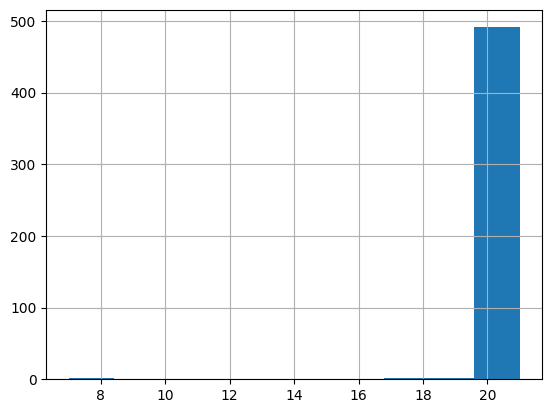

In [89]:
import matplotlib.pyplot as plt
quarter_count_per_ticker['QuarterCount'].hist()
plt.show()


In [46]:
import pandas as pd

file_name = "dividend.csv"
df = pd.read_csv(file_name)

In [47]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df.dtypes

Unnamed: 0                  int64
Ticker                     object
Date          datetime64[ns, UTC]
Dividend                  float64
dtype: object

In [49]:
import pandas as pd

# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.sort_values(by=['Ticker', 'Date'], inplace=True)
df.set_index('Date', inplace=True)

expanded_df = pd.DataFrame()

# Iterate through unique tickers and expand data
for ticker, group in df.groupby('Ticker'):
    # Resample to last day of the month within each ticker group
    ticker_expanded = group.resample('M').last()

    # Set all the expanded months in between the quarters to 0 for dividend
    ticker_expanded['Dividend'].fillna(0, inplace=True)
    expanded_df = expanded_df.append(ticker_expanded.ffill())


expanded_df.reset_index(inplace=True)
expanded_df['Date'] = expanded_df['Date'].dt.date


<ipython-input-49-d4e42e372dfa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(ticker_expanded.ffill())
<ipython-input-49-d4e42e372dfa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(ticker_expanded.ffill())
<ipython-input-49-d4e42e372dfa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(ticker_expanded.ffill())
<ipython-input-49-d4e42e372dfa>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(ticker_expanded.ffill())
<ipython-input-49-d4e42e372dfa>:23: FutureWarning: The frame.append method is deprec

In [52]:
expanded_df

,Date,Ticker,Dividend
0,2018-04-30,A,0.149
1,2018-05-31,A,0.000
2,2018-06-30,A,0.000
3,2018-07-31,A,0.149
4,2018-08-31,A,0.000
...,...,...,...
25223,2023-03-31,ZTS,0.000
25224,2023-04-30,ZTS,0.375
25225,2023-05-31,ZTS,0.000
25226,2023-06-30,ZTS,0.000


In [51]:
expanded_df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
# Strip timestamps
df['Date'] = df['Date'].str[:-15]


,Unnamed: 0,Ticker,Date,Dividend
0,0,MMM,2018-02-15,1.360
1,1,MMM,2018-05-17,1.360
2,2,MMM,2018-08-23,1.360
3,3,MMM,2018-11-21,1.360
4,4,MMM,2019-02-14,1.440
...,...,...,...,...
8531,8531,ZTS,2022-07-20,0.325
8532,8532,ZTS,2022-10-31,0.325
8533,8533,ZTS,2023-01-19,0.375
8534,8534,ZTS,2023-04-20,0.375


In [56]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
expanded_df

,Date,Ticker,Dividend
0,2018-04-30,A,0.149
1,2018-05-31,A,0.149
2,2018-06-30,A,0.149
3,2018-07-31,A,0.149
4,2018-08-31,A,0.149
...,...,...,...
25222,2023-02-28,ZTS,0.375
25223,2023-03-31,ZTS,0.375
25224,2023-04-30,ZTS,0.375
25225,2023-05-31,ZTS,0.375


In [123]:
# Saving to CSV
file_path = '/content/unified_matrix.csv'

df.to_csv(file_path, index=True)  # Set index=False to exclude the index column

with open(file_path, 'w', newline='') as file:
    df.to_csv(file, index=True)

print(f'DataFrame saved to {file_path}')

DataFrame saved to /content/unified_matrix.csv


In [ ]:
# Convert date to last day of month
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.to_period('M').dt.to_timestamp('M')



In [12]:
monthly_fin1=monthly_fin.drop(columns=['Unnamed: 0','index'])
monthly_fin1

,date,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,Symbol
0,2019-01-31,5.040000e+08,1.266000e+09,5.036000e+09,318000000,3.916000e+09,A
1,2019-02-28,3.966667e+08,1.251000e+09,5.065667e+09,318000000,3.909667e+09,A
2,2019-03-31,2.893333e+08,1.236000e+09,5.095333e+09,318000000,3.903333e+09,A
3,2019-04-30,1.820000e+08,1.221000e+09,5.125000e+09,317000000,3.897000e+09,A
4,2019-05-31,1.850000e+08,1.232667e+09,4.999000e+09,317000000,3.890667e+09,A
...,...,...,...,...,...,...,...
27694,2023-02-28,5.216667e+08,2.013333e+09,4.464333e+09,463808059,9.682667e+09,ZTS
27695,2023-03-31,5.520000e+08,2.000000e+09,4.494000e+09,462495343,9.263000e+09,ZTS
27696,2023-04-30,5.916667e+08,2.060000e+09,4.537667e+09,462495343,9.218000e+09,ZTS
27697,2023-05-31,6.313333e+08,2.120000e+09,4.581333e+09,462495343,9.173000e+09,ZTS


In [13]:
dividends.drop(columns=['Unnamed: 0'], inplace=True)

In [23]:
dividends

,Date,Ticker,Dividend
0,2018-04-30,A,0.149
1,2018-05-31,A,0.149
2,2018-06-30,A,0.149
3,2018-07-31,A,0.149
4,2018-08-31,A,0.149
...,...,...,...
24849,2023-02-28,ZTS,0.375
24850,2023-03-31,ZTS,0.375
24851,2023-04-30,ZTS,0.375
24852,2023-05-31,ZTS,0.375


In [21]:
import pandas as pd

monthly_fin1['commonStockSharesOutstanding'].replace('None', '0', inplace=True)
monthly_fin1['commonStockSharesOutstanding'] = monthly_fin1['commonStockSharesOutstanding'].astype(float)
monthly_fin1.dtypes


date                             object
netIncome                       float64
totalRevenue                    float64
totalShareholderEquity          float64
commonStockSharesOutstanding    float64
totalLiabilities                float64
Symbol                           object
dtype: object


In [55]:
dividends=expanded_df
monthly_fin1=df_monthly_interpolated2

In [58]:
monthly_fin1.rename(columns={'fiscalDateEnding':'Date'}, inplace=True)
monthly_fin1.columns

Index(['Date', 'Symbol', 'netIncome', 'totalRevenue', 'totalShareholderEquity',
       'commonStockSharesOutstanding', 'totalLiabilities', 'operatingExpenses',
       'inventory', 'totalCurrentAssets', 'totalCurrentLiabilities',
       'costofGoodsAndServicesSold'],
      dtype='object')

In [60]:
dividends.rename(columns={'Ticker':'Symbol'}, inplace=True)

In [68]:
#remove UTC timezone information
dividends['Date'] = dividends['Date'].dt.tz_localize(None)

dividends.dtypes

Date        datetime64[ns]
Symbol              object
Dividend           float64
dtype: object

In [69]:
# Chain the outer joins together
time_series = pd.merge(monthly_fin1, dividends, on=['Symbol','Date'], how='outer')


In [70]:
time_series.isna().sum()

Date                               0
Symbol                             0
netIncome                       4172
totalRevenue                    4282
totalShareholderEquity          4282
commonStockSharesOutstanding    4285
totalLiabilities                4282
operatingExpenses               4282
inventory                       6935
totalCurrentAssets              4282
totalCurrentLiabilities         4333
costofGoodsAndServicesSold      4309
Dividend                        5958
dtype: int64

In [71]:
len(time_series)

31186

In [54]:
time_series.dtypes
time_series1=time_series.copy()
time_series1['date'] = time_series1['date'].apply(str)
time_series1['Symbol'] = time_series1['Symbol'].apply(str)

In [55]:
time_series1.dtypes

date                             object
netIncome                       float64
totalRevenue                    float64
totalShareholderEquity          float64
commonStockSharesOutstanding    float64
totalLiabilities                float64
Symbol                           object
Dividend                        float64
dtype: object

In [45]:
nan_mask = time_series.isna()
rows_with_nan = time_series[nan_mask.any(axis=1)]
affected_tickers = rows_with_nan['Symbol'].unique()

pd.set_option('display.max_rows', None)
time_series[nan_mask.any(axis=1)]
pd.reset_option("display.max_rows")


Output hidden; open in https://colab.research.google.com to view.

In [92]:
monthly_GDP.dtypes

Date     object
GDP     float64
dtype: object

In [84]:
trading_volume.drop(columns=['Unnamed: 0'], inplace=True)
stock_price.drop(columns=['Unnamed: 0'], inplace=True)
fed_funds_rate.drop(columns=['Unnamed: 0'], inplace=True)
monthly_GDP.drop(columns=['Unnamed: 0'], inplace=True)

In [88]:
fed_funds_rate.rename(columns={'date':'Date'}, inplace=True)
monthly_GDP.rename(columns={'date':'Date'}, inplace=True)


In [93]:
stock_price.rename(columns={'Tickers':'Symbol'}, inplace=True)
trading_volume.rename(columns={'Tickers':'Symbol'}, inplace=True)

In [101]:
monthly_GDP['Date'] = pd.to_datetime(monthly_GDP['Date'])
monthly_GDP.dtypes

Date    datetime64[ns]
GDP            float64
dtype: object

In [97]:
merged_df = time_series.merge(trading_volume, on=['Date','Symbol'], how='outer'
                      ).merge(stock_price, on=['Date','Symbol'], how='outer')


In [99]:
merged_df.shape

(42876, 15)

In [103]:
raw_df = merged_df.merge(fed_funds_rate, on='Date', how='outer'
                  ).merge(monthly_GDP, on='Date', how='outer')

In [104]:
raw_df.shape

(42877, 17)

In [119]:
drop_df = raw_df.dropna()
drop_df

,Date,Symbol,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,operatingExpenses,inventory,totalCurrentAssets,totalCurrentLiabilities,costofGoodsAndServicesSold,Dividend,Volume,Adj Close,fed_funds_rate,GDP
0,2019-01-31,A,5.040000e+08,1.266000e+09,5.036000e+09,3.180000e+08,3.916000e+09,4.960000e+08,6.530000e+08,3.712000e+09,1.095000e+09,5.770000e+08,0.00,2.196933e+06,66.795341,2.40,4584.814000
1,2019-01-31,AAL,2.783333e+08,1.072967e+10,-3.246667e+08,4.551460e+08,6.097367e+10,8.916667e+08,1.570000e+09,8.642667e+09,1.868033e+10,2.684000e+09,0.00,9.506640e+06,32.344656,2.40,4584.814000
2,2019-01-31,AAPL,1.716367e+10,7.461500e+10,1.138813e+11,4.688963e+09,2.492640e+11,8.592000e+09,4.953333e+09,1.350007e+11,1.034460e+11,4.691733e+10,0.00,1.730210e+08,37.210676,2.40,4584.814000
3,2019-01-31,ABBV,-3.986667e+08,8.146000e+09,-8.239333e+09,1.490667e+09,6.673033e+10,1.064400e+10,1.637333e+09,1.610100e+10,1.612733e+10,1.912667e+09,1.07,8.256877e+06,69.230545,2.40,4584.814000
4,2019-01-31,ABT,6.600000e+08,7.629333e+09,3.065767e+10,1.761723e+09,3.666100e+10,3.484667e+09,3.892333e+09,1.455767e+10,9.045667e+09,3.180667e+09,0.32,7.671083e+06,64.558861,2.40,4584.814000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29052,2018-08-31,NKE,1.092000e+09,1.973000e+10,8.992000e+09,1.594000e+09,1.349100e+10,3.063000e+09,5.227000e+09,1.550100e+10,6.708000e+09,5.551000e+09,0.20,5.595730e+06,75.839226,1.91,4717.323667
29054,2018-08-31,PAYX,2.436000e+08,8.628000e+08,2.387000e+09,3.590000e+08,4.663000e+09,5.425000e+08,3.763800e+09,5.076200e+09,4.397400e+09,2.655000e+08,0.00,1.639630e+06,61.706370,1.91,4717.323667
29055,2018-08-31,STZ,1.149500e+09,4.704400e+09,1.126830e+10,1.904950e+08,1.256230e+10,4.032000e+08,1.941900e+09,3.585500e+09,2.162500e+09,1.130900e+09,0.74,2.438757e+06,195.101321,1.91,4717.323667
29056,2018-08-31,WBA,1.512000e+09,3.344200e+10,2.600700e+10,9.748000e+08,4.211700e+10,6.584000e+09,9.565000e+09,1.784600e+10,2.166700e+10,2.586700e+10,0.44,5.895743e+06,54.997358,1.91,4717.323667


In [91]:
# Check data
value1='2023-06-29'
value2='ZTS'
result = merged_df[(merged_df['Date'] == value1) & (merged_df['Tickers'] == value2)]
result

,Date,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,Tickers,Dividend,Volume,Adj Close
39300,2023-06-29,NaN,NaN,NaN,NaN,NaN,ZTS,NaN,2.192707e+06,168.943788


In [94]:
merged_df1=merged_df.dropna()
merged_df1

,Date,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,Tickers,Dividend,Volume,Adj Close
0,2019-01-31,5.040000e+08,1.266000e+09,5.036000e+09,318000000.0,3.916000e+09,A,0.164,2.196933e+06,66.795341
1,2019-02-28,3.966667e+08,1.251000e+09,5.065667e+09,318000000.0,3.909667e+09,A,0.164,1.866410e+06,73.297129
3,2019-04-30,1.820000e+08,1.221000e+09,5.125000e+09,317000000.0,3.897000e+09,A,0.164,1.807587e+06,77.022864
4,2019-05-31,1.850000e+08,1.232667e+09,4.999000e+09,317000000.0,3.890667e+09,A,0.164,3.190033e+06,71.172318
6,2019-07-31,1.910000e+08,1.256000e+09,4.747000e+09,310000000.0,3.878000e+09,A,0.164,2.552590e+06,69.973080
...,...,...,...,...,...,...,...,...,...,...
20160,2022-11-30,4.836667e+08,2.027333e+09,4.491000e+09,466442095.0,1.001867e+10,ZTS,0.375,2.671823e+06,145.341229
20162,2023-01-31,4.913333e+08,2.026667e+09,4.434667e+09,463808059.0,1.010233e+10,ZTS,0.375,2.219257e+06,153.280092
20163,2023-02-28,5.216667e+08,2.013333e+09,4.464333e+09,463808059.0,9.682667e+09,ZTS,0.375,2.336277e+06,165.454036
20164,2023-03-31,5.520000e+08,2.000000e+09,4.494000e+09,462495343.0,9.263000e+09,ZTS,0.375,1.953233e+06,165.375347


In [95]:
merged_df1.Date.min()

'2018-07-31'

<ipython-input-103-045c49308a2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
<ipython-input-103-045c49308a2b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='Date', inplace=True)
<ipython-input-103-045c49308a2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

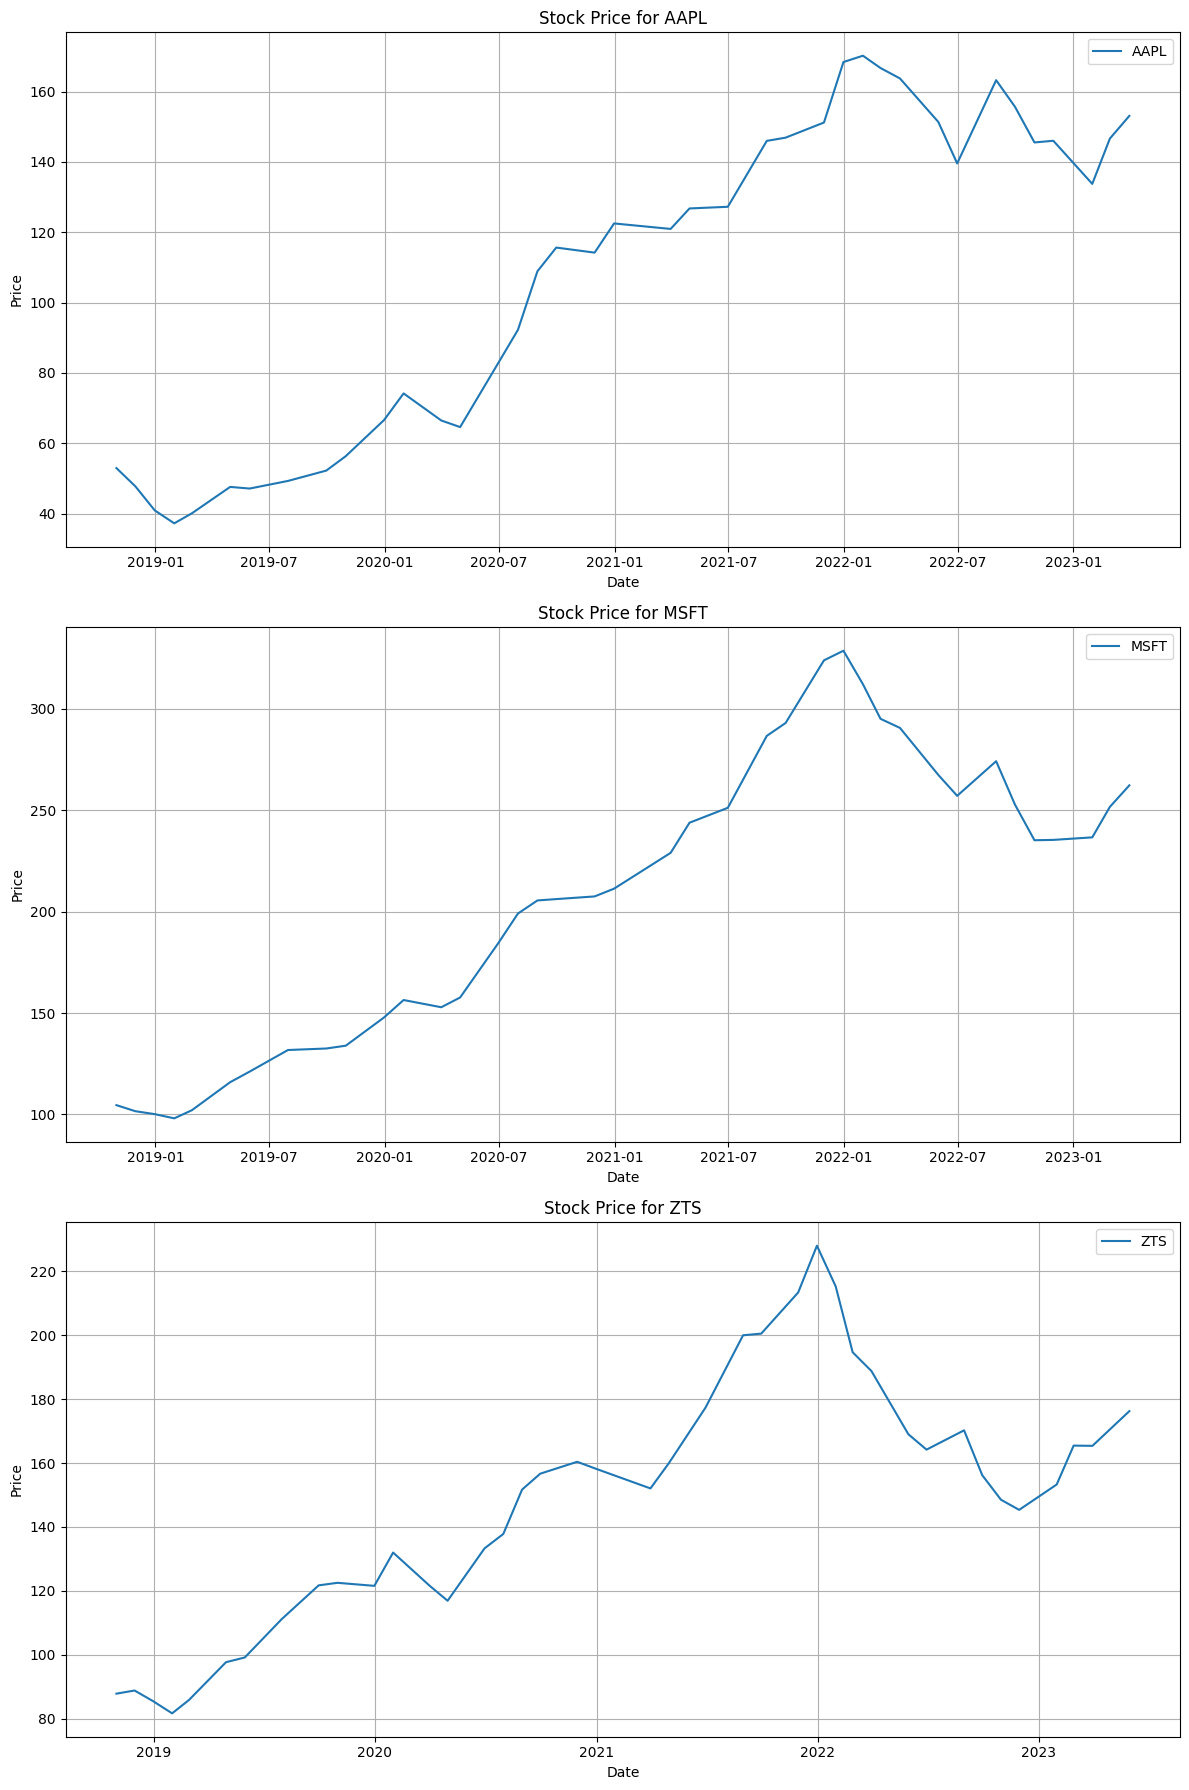

In [103]:
import matplotlib.pyplot as plt

tickers_to_plot = ['AAPL', 'MSFT', 'ZTS']

fig, axes = plt.subplots(nrows=len(tickers_to_plot), ncols=1, figsize=(12, 6 * len(tickers_to_plot)))

for i, ticker in enumerate(tickers_to_plot):

    filtered_df = merged_df1[merged_df1['Tickers'] == ticker]
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
    filtered_df.sort_values(by='Date', inplace=True)

    axes[i].plot(filtered_df['Date'], filtered_df['Adj Close'], label=ticker)
    axes[i].set_title(f'Stock Price for {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [129]:
df=raw_df
df

,Date,Symbol,netIncome,totalRevenue,totalShareholderEquity,commonStockSharesOutstanding,totalLiabilities,operatingExpenses,inventory,totalCurrentAssets,totalCurrentLiabilities,costofGoodsAndServicesSold,Dividend,Volume,Adj Close,fed_funds_rate,GDP
0,2019-01-31,A,5.040000e+08,1.266000e+09,5.036000e+09,3.180000e+08,3.916000e+09,4.960000e+08,6.530000e+08,3.712000e+09,1.095000e+09,5.770000e+08,0.00,2.196933e+06,66.795341,2.40,4584.814
1,2019-01-31,AAL,2.783333e+08,1.072967e+10,-3.246667e+08,4.551460e+08,6.097367e+10,8.916667e+08,1.570000e+09,8.642667e+09,1.868033e+10,2.684000e+09,0.00,9.506640e+06,32.344656,2.40,4584.814
2,2019-01-31,AAPL,1.716367e+10,7.461500e+10,1.138813e+11,4.688963e+09,2.492640e+11,8.592000e+09,4.953333e+09,1.350007e+11,1.034460e+11,4.691733e+10,0.00,1.730210e+08,37.210676,2.40,4584.814
3,2019-01-31,ABBV,-3.986667e+08,8.146000e+09,-8.239333e+09,1.490667e+09,6.673033e+10,1.064400e+10,1.637333e+09,1.610100e+10,1.612733e+10,1.912667e+09,1.07,8.256877e+06,69.230545,2.40,4584.814
4,2019-01-31,ABT,6.600000e+08,7.629333e+09,3.065767e+10,1.761723e+09,3.666100e+10,3.484667e+09,3.892333e+09,1.455767e+10,9.045667e+09,3.180667e+09,0.32,7.671083e+06,64.558861,2.40,4584.814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42872,2023-06-29,ZBH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.589577e+06,135.914623,NaN,NaN
42873,2023-06-29,ZBRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709700e+05,274.414666,NaN,NaN
42874,2023-06-29,ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.042810e+06,28.125514,NaN,NaN
42875,2023-06-29,ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192707e+06,168.943788,NaN,NaN


In [130]:
cols_to_convert = df.columns.difference(['Date','Symbol'])
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

#solvency ratio
df['debt_to_equity'] = (df['totalLiabilities']) / df['totalShareholderEquity']

#profitability
df['EPS'] = df['netIncome'] / df['commonStockSharesOutstanding']
df['return_on_equity'] = df['netIncome'] / df['totalShareholderEquity']

#liquidity ratio
df['quick ratio'] = (df['totalCurrentAssets'] - df['inventory']) /  df['totalCurrentLiabilities']

#efficiency ratio
df['operating_ratio'] = (df['operatingExpenses'] + df['costofGoodsAndServicesSold']) / df['totalRevenue']
df['inventory_turnover'] = df['costofGoodsAndServicesSold'] / df['inventory']


In [137]:
df.columns

Index(['Date', 'Symbol', 'netIncome', 'totalRevenue', 'totalShareholderEquity',
       'commonStockSharesOutstanding', 'totalLiabilities', 'operatingExpenses',
       'inventory', 'totalCurrentAssets', 'totalCurrentLiabilities',
       'costofGoodsAndServicesSold', 'Dividend', 'Volume', 'Adj Close',
       'fed_funds_rate', 'GDP', 'debt_to_equity', 'EPS', 'return_on_equity',
       'quick ratio', 'operating_ratio', 'inventory_turnover'],
      dtype='object')

In [141]:
time_series = df_sorted[['Date', 'Symbol', 'Dividend', 'Volume',
       'fed_funds_rate', 'GDP', 'debt_to_equity', 'EPS', 'return_on_equity',
       'quick ratio', 'operating_ratio', 'inventory_turnover', 'Stock Price']]

In [142]:
time_series

,Date,Symbol,Dividend,Volume,fed_funds_rate,GDP,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,Stock Price
29538,2018-07-31,HPQ,0.00,6.845513e+06,1.91,4689.905000,-20.385399,0.556258,-0.498019,0.614953,0.925134,1.953374,19.810163
29037,2018-08-31,CCL,0.50,3.182053e+06,1.91,4717.323667,0.693559,2.417847,0.069238,0.168329,0.692598,7.303704,55.871806
29042,2018-08-31,FDS,0.64,2.294333e+05,1.91,4717.323667,1.699082,1.801999,0.130867,1.920293,1.234522,27.010998,203.856165
29043,2018-08-31,FDX,0.00,1.211117e+06,1.91,4717.323667,1.706984,3.150943,0.043551,1.261503,0.378313,7.585086,224.475233
29045,2018-08-31,HPQ,0.00,6.493083e+06,1.91,4717.323667,-25.713635,0.679721,-0.769470,0.613254,0.927927,1.998739,20.428785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25460,2023-03-31,XYL,0.00,1.532100e+06,4.65,5053.623333,1.216042,0.548780,0.027669,1.441098,0.931630,1.052509,100.078591
25461,2023-03-31,YUM,0.00,1.474093e+06,4.65,5053.623333,-1.655231,1.067616,-0.034192,0.709968,0.435866,0.911765,126.797676
25462,2023-03-31,ZBH,0.24,1.147900e+06,4.65,5053.623333,0.747768,1.110315,0.019135,0.929235,0.820884,0.223442,124.411347
25464,2023-03-31,ZION,0.00,5.970143e+06,4.65,5053.623333,16.085841,1.377448,0.039352,0.296107,0.615894,-17.000000,38.069854


In [134]:
df_sorted1 = df.sort_values(by=['Date', 'Symbol'], ascending=[True, True])

In [135]:
df_sorted1.rename(columns={'Adj Close':'Stock Price'}, inplace=True)

In [119]:
# Federal Fund Rates
import pandas as pd
import requests

api_key = 'O9Z5FCM7GG8AMV2Q'

url = url = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey={api_key}'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    data_list1 = data.get('data', [])
    GDP = pd.DataFrame(data_list1)

    GDP['date'] = pd.to_datetime(GDP['date'])
    GDP = GDP[(GDP['date'] >= '2018-01-01') & (GDP['date'] <= '2023-12-31')]
    GDP.rename(columns={'value':'GDP'}, inplace=True)
else:
    print('Error:', response.status_code)


In [125]:
GDP['date'] = pd.to_datetime(GDP['date'])
GDP = GDP[(GDP['date'] >= '2018-01-01') & (GDP['date'] <= '2023-12-31')]
GDP.rename(columns={'value':'GDP(B)'}, inplace=True)

<ipython-input-125-0e43bb587b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP['date'] = pd.to_datetime(GDP['date'])


In [131]:
ffr['date'] = ffr['date'].dt.to_period('M').dt.to_timestamp('M')
# GDP.rename(columns={'value':'GDP(B)'}, inplace=True)
ffr

,date,fed_funds_rate
0,2023-08-31,5.33
1,2023-07-31,5.12
2,2023-06-30,5.08
3,2023-05-31,5.06
4,2023-04-30,4.83
...,...,...
63,2018-05-31,1.70
64,2018-04-30,1.69
65,2018-03-31,1.51
66,2018-02-28,1.42


In [135]:
GDP.dtypes

date    datetime64[ns]
GDP             object
dtype: object

In [141]:
# GDP.set_index('date', inplace=True)
all_months = pd.date_range(start=GDP.index.min(), end=GDP.index.max(), freq='M')
GDP_interpolated = GDP.reindex(all_months)
GDP_interpolated['GDP'] = pd.to_numeric(GDP_interpolated['GDP'], errors='coerce')
GDP_interpolated['GDP'] = GDP_interpolated['GDP'].interpolate(method='linear')



In [147]:
GDP_interpolated.reset_index(inplace=True)
GDP_interpolated.rename(columns={'index':'date'}, inplace=True)

In [169]:
NLP_data.dtypes

Headline            object
Date        datetime64[ns]
Stock               object
Neu                float64
Pos                float64
Neg                float64
pos_ma             float64
neu_ma             float64
neg_ma             float64
Year                 int64
Month                int64
dtype: object

In [91]:

NLP_data['Date'] = pd.to_datetime(NLP_data['Date'])

NLP_data['Year'] = NLP_data['Date'].dt.year
NLP_data['Month'] = NLP_data['Date'].dt.month

NLP_data.sort_values(by=['Stock', 'Year', 'Month'], inplace=True)

NLP_data['pos_ma'] = NLP_data.groupby(['Stock', 'Year', 'Month'])['Positive'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
NLP_data['neu_ma'] = NLP_data.groupby(['Stock', 'Year', 'Month'])['Neutral'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
NLP_data['neg_ma'] = NLP_data.groupby(['Stock', 'Year', 'Month'])['Negative'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())



In [93]:
NLP_data.shape

(111179, 11)

In [163]:
# Check data for one stock
specific_stock = 'AAPL'
filtered_data = NLP_data[NLP_data['Stock'] == specific_stock]
filtered_data


,Headline,Date,Stock,Neu,Pos,Neg,pos_ma,neu_ma,neg_ma,Year,Month
1242,dow jones futures bear market eyes new leg dow...,2022-09-23,AAPL,1.040274e-07,9.999998e-01,7.960357e-08,9.999998e-01,1.040274e-07,7.960357e-08,2022,9
1241,apple workers in oklahoma vote for companys se...,2022-10-14,AAPL,9.999200e-01,3.291652e-07,7.966326e-05,3.291652e-07,9.999200e-01,7.966326e-05,2022,10
1240,the dow is having a great month the nasdaq is ...,2022-10-28,AAPL,2.615622e-07,9.999996e-01,6.357453e-08,5.000000e-01,4.999601e-01,3.986342e-05,2022,10
1239,sp 500 earnings update the sp 500 eps revision...,2022-11-05,AAPL,1.489009e-01,8.483837e-01,2.715445e-03,8.483837e-01,1.489009e-01,2.715445e-03,2022,11
1238,weekly round up,2022-12-16,AAPL,9.999871e-01,7.099194e-06,5.737579e-06,7.099194e-06,9.999871e-01,5.737579e-06,2022,12
1237,1 warren buffett stock down 27 to buy in 2023,2023-01-06,AAPL,1.470102e-01,1.929208e-03,8.510607e-01,1.929208e-03,1.470102e-01,8.510607e-01,2023,1
1236,tech earnings weren’t great stocks are soaring...,2023-02-03,AAPL,9.030438e-03,6.188711e-04,9.903507e-01,6.188711e-04,9.030438e-03,9.903507e-01,2023,2
1235,warren buffets trip up the billionaires list,2023-02-24,AAPL,9.999969e-01,4.893103e-07,2.679565e-06,3.096802e-04,5.045137e-01,4.951767e-01,2023,2
1234,apple wins reversal of 502 million virnetx pat...,2023-03-31,AAPL,2.092713e-01,7.880498e-01,2.678853e-03,7.880498e-01,2.092713e-01,2.678853e-03,2023,3
1233,the old ceo’s back but it doesn’t mean things ...,2023-04-07,AAPL,9.638537e-04,1.474766e-04,9.988887e-01,1.474766e-04,9.638537e-04,9.988887e-01,2023,4


In [94]:
max_idx = NLP_data.groupby(['Stock', 'Year', 'Month'])['Date'].idxmax()
result = NLP_data.loc[max_idx]

In [ ]:
result['Date'] = result['Date'].dt.to_period('M').dt.to_timestamp('M')

In [99]:
NLP_1820_cleaned = result[['Date', 'Stock', 'pos_ma', 'neu_ma', 'neg_ma']]
NLP_1820_cleaned.columns

Index(['Date', 'Stock', 'pos_ma', 'neu_ma', 'neg_ma'], dtype='object')

In [100]:
NLP_1820.head()

,Headline,Date,Stock,Neutral,Positive,Negative
0,50 biggest movers from yesterday,2018-11-21,A,8.389207e-01,3.987503e-02,1.212042e-01
1,36 stocks moving in tuesdays midday session,2018-11-20,A,9.999959e-01,1.325494e-07,3.961927e-06
2,shares of agilent technologies are trading up ...,2018-11-20,A,4.851770e-08,1.000000e+00,1.385383e-09
3,morgan stanley maintains overweight on agilent...,2018-11-20,A,3.539342e-07,9.999996e-01,2.367040e-08
4,26 stocks moving in tuesdays premarket session,2018-11-20,A,9.999979e-01,1.054393e-07,2.009748e-06


In [80]:
from google.colab import files
uploaded = files.upload()


Saving sentiment_result2020.csv to sentiment_result2020.csv


In [83]:
NLP_2018 = pd.read_csv('sentiment2018.csv')
NLP_2019_1 = pd.read_csv('sentiment2019p1.csv')
NLP_2019_2 = pd.read_csv('sentiment2019p2.csv')
NLP_2020 = pd.read_csv('sentiment_result2020.csv')


In [84]:
NLP_1820 = pd.concat([NLP_2018, NLP_2019_1, NLP_2019_2, NLP_2020], axis=0)
NLP_1820.shape

(111179, 7)

In [85]:
NLP_1820.columns

Index(['Unnamed: 0', 'Headline', 'Date', 'Stock', 'Neutral', 'Positive',
       'Negative'],
      dtype='object')

In [2]:
import pandas as pd
import io

time_series = pd.read_csv(io.BytesIO(uploaded['cleaned_time_series.csv']))


In [19]:
NLP_2022 = pd.read_csv(io.BytesIO(uploaded['NLP_features.csv']))

In [22]:
# time_series.drop(columns=['Unnamed: 0'], inplace=True)
NLP_2022.drop(columns=['Unnamed: 0'], inplace=True)
time_series.shape

(13033, 13)

In [102]:
NLP_2022.columns

Index(['Date', 'Stock', 'pos_ma', 'neu_ma', 'neg_ma'], dtype='object')

In [115]:
NLP_2022['Date'] = pd.to_datetime(time_series['Date'])
NLP_2022.dtypes

Date      datetime64[ns]
Stock             object
pos_ma           float64
neu_ma           float64
neg_ma           float64
dtype: object

In [117]:
NLP = pd.concat([NLP_1820_cleaned, NLP_2022], axis=0)
NLP.shape

(40381, 5)

In [118]:
df = time_series.merge(NLP, left_on=['Date', 'Symbol'],
                       right_on=['Date', 'Stock'], how='outer'
                       )
df.shape

(49978, 17)

In [120]:
df.isna().sum()

Date                      0
Symbol                25150
Dividend              25150
Volume                25150
fed_funds_rate        25150
GDP                   25150
debt_to_equity        25150
EPS                   25150
return_on_equity      25150
quick ratio           25150
operating_ratio       25150
inventory_turnover    25150
Stock Price           25150
Stock                  9597
pos_ma                 9597
neu_ma                 9597
neg_ma                 9597
dtype: int64

In [121]:
df.dropna(subset=['Symbol', 'Stock Price'], inplace=True)
df.shape

(24828, 17)

In [122]:
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Dividend                     float64
Volume                       float64
fed_funds_rate               float64
GDP                          float64
debt_to_equity               float64
EPS                          float64
return_on_equity             float64
quick ratio                  float64
operating_ratio              float64
inventory_turnover           float64
Stock Price                  float64
Stock                         object
pos_ma                       float64
neu_ma                       float64
neg_ma                       float64
dtype: object

In [56]:
df.reset_index(inplace=True)


,index,Date,Symbol,Dividend,Volume,fed_funds_rate,GDP,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,Stock Price,Stock,pos_ma,neu_ma,neg_ma
0,0,2018-07-31,HPQ,0.00,6.845513e+06,1.91,4689.905000,-20.385399,0.556258,-0.498019,0.614953,0.925134,1.953374,19.810163,NaN,NaN,NaN,NaN
1,1,2018-08-31,CCL,0.50,3.182053e+06,1.91,4717.323667,0.693559,2.417847,0.069238,0.168329,0.692598,7.303704,55.871806,NaN,NaN,NaN,NaN
2,2,2018-08-31,FDS,0.64,2.294333e+05,1.91,4717.323667,1.699082,1.801999,0.130867,1.920293,1.234522,27.010998,203.856165,NaN,NaN,NaN,NaN
3,3,2018-08-31,FDX,0.00,1.211117e+06,1.91,4717.323667,1.706984,3.150943,0.043551,1.261503,0.378313,7.585086,224.475233,NaN,NaN,NaN,NaN
4,4,2018-08-31,HPQ,0.00,6.493083e+06,1.91,4717.323667,-25.713635,0.679721,-0.769470,0.613254,0.927927,1.998739,20.428785,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13028,13028,2023-03-31,XYL,0.00,1.532100e+06,4.65,5053.623333,1.216042,0.548780,0.027669,1.441098,0.931630,1.052509,100.078591,XYL,1.000000e+00,7.908352e-10,6.626421e-09
13029,13029,2023-03-31,YUM,0.00,1.474093e+06,4.65,5053.623333,-1.655231,1.067616,-0.034192,0.709968,0.435866,0.911765,126.797676,YUM,9.999998e-01,1.658575e-07,1.465031e-07
13030,13030,2023-03-31,ZBH,0.24,1.147900e+06,4.65,5053.623333,0.747768,1.110315,0.019135,0.929235,0.820884,0.223442,124.411347,ZBH,5.903665e-01,1.128311e-02,3.983504e-01
13031,13031,2023-03-31,ZION,0.00,5.970143e+06,4.65,5053.623333,16.085841,1.377448,0.039352,0.296107,0.615894,-17.000000,38.069854,ZION,4.632685e-07,9.987674e-01,1.232253e-03


In [57]:
df.drop(columns=['index'], inplace=True)
df

,Date,Symbol,Dividend,Volume,fed_funds_rate,GDP,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,Stock Price,Stock,pos_ma,neu_ma,neg_ma
0,2018-07-31,HPQ,0.00,6.845513e+06,1.91,4689.905000,-20.385399,0.556258,-0.498019,0.614953,0.925134,1.953374,19.810163,NaN,NaN,NaN,NaN
1,2018-08-31,CCL,0.50,3.182053e+06,1.91,4717.323667,0.693559,2.417847,0.069238,0.168329,0.692598,7.303704,55.871806,NaN,NaN,NaN,NaN
2,2018-08-31,FDS,0.64,2.294333e+05,1.91,4717.323667,1.699082,1.801999,0.130867,1.920293,1.234522,27.010998,203.856165,NaN,NaN,NaN,NaN
3,2018-08-31,FDX,0.00,1.211117e+06,1.91,4717.323667,1.706984,3.150943,0.043551,1.261503,0.378313,7.585086,224.475233,NaN,NaN,NaN,NaN
4,2018-08-31,HPQ,0.00,6.493083e+06,1.91,4717.323667,-25.713635,0.679721,-0.769470,0.613254,0.927927,1.998739,20.428785,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13028,2023-03-31,XYL,0.00,1.532100e+06,4.65,5053.623333,1.216042,0.548780,0.027669,1.441098,0.931630,1.052509,100.078591,XYL,1.000000e+00,7.908352e-10,6.626421e-09
13029,2023-03-31,YUM,0.00,1.474093e+06,4.65,5053.623333,-1.655231,1.067616,-0.034192,0.709968,0.435866,0.911765,126.797676,YUM,9.999998e-01,1.658575e-07,1.465031e-07
13030,2023-03-31,ZBH,0.24,1.147900e+06,4.65,5053.623333,0.747768,1.110315,0.019135,0.929235,0.820884,0.223442,124.411347,ZBH,5.903665e-01,1.128311e-02,3.983504e-01
13031,2023-03-31,ZION,0.00,5.970143e+06,4.65,5053.623333,16.085841,1.377448,0.039352,0.296107,0.615894,-17.000000,38.069854,ZION,4.632685e-07,9.987674e-01,1.232253e-03


In [74]:
## Rolling scaling (do not use)

import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

numeric_cols = df.select_dtypes(include=['number']).columns

window_size = '90D'  # 3-month window size
min_periods = 1

grouped = df.groupby('Symbol')

merged_df = pd.DataFrame()

for ticker, ticker_data in grouped:
    rolling_scaled = ticker_data[numeric_cols].rolling(window=window_size, min_periods=min_periods).mean()
    ticker_data_scaled = pd.concat([rolling_scaled, ticker_data.drop(columns=numeric_cols)], axis=1)
    merged_df = pd.concat([merged_df, ticker_data_scaled])

merged_df.reset_index(inplace=True)

# merged_df.fillna(0, inplace=True)


In [75]:
merged_df

,Date,Dividend,Volume,fed_funds_rate,GDP,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,Stock Price,pos_ma,neu_ma,neg_ma,Symbol,Stock
0,2019-01-31,0.000000,2.196933e+06,2.400000,4584.814000,0.777601,1.584906,0.100079,2.793607,0.847551,0.883614,66.795341,NaN,NaN,NaN,A,NaN
1,2019-02-28,0.000000,2.031672e+06,2.400000,4612.849167,0.774699,1.416797,0.089192,2.798406,0.850634,0.880676,70.046235,NaN,NaN,NaN,A,NaN
2,2019-04-30,0.054667,1.956977e+06,2.406667,4659.574444,0.769930,1.135909,0.071299,2.806272,0.855924,0.875803,72.371778,NaN,NaN,NaN,A,NaN
3,2019-05-31,0.082000,2.498810e+06,2.405000,4760.224333,0.769340,0.581028,0.036260,2.591277,0.866459,0.868693,74.097591,NaN,NaN,NaN,A,NaN
4,2019-07-31,0.082000,2.871312e+06,2.395000,4781.822333,0.797613,0.602026,0.038622,2.042482,0.866328,0.876573,70.572699,NaN,NaN,NaN,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13028,2022-10-31,0.108333,1.719807e+06,2.656667,5110.816333,1.989535,1.118016,0.112732,1.491233,0.651045,0.267389,158.311179,1.280126e-02,0.657053,0.330146,ZTS,ZTS
13029,2022-11-30,0.108333,2.121037e+06,3.140000,5118.795444,2.080813,1.087511,0.110590,1.528714,0.660427,0.268574,150.014586,8.534273e-03,0.771366,0.220099,ZTS,ZTS
13030,2023-01-31,0.187500,2.445540e+06,4.055000,5019.606000,2.254434,1.050596,0.109245,1.640930,0.676451,0.267346,149.310660,2.939670e-07,0.999994,0.000006,ZTS,NaN
13031,2023-02-28,0.187500,2.277767e+06,4.450000,4976.520833,2.223465,1.093610,0.113823,1.748741,0.671018,0.252973,159.367064,4.979981e-01,0.501850,0.000152,ZTS,ZTS
